In [32]:
from sklearn.datasets import load_wine
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

LOAD DATASET IRIS


In [43]:
wine = load_wine(as_frame=True)
df = pd.DataFrame(wine['data'])
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [24]:
X = wine.data
y = wine.target
n = list(range(1, 51))
param_grid = {'n_estimators' : n}
model = RandomForestClassifier()

In [26]:
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [30]:
gf = grid.cv_results_['mean_test_score']
gf

array([0.84873016, 0.85539683, 0.91095238, 0.96095238, 0.94428571,
       0.9552381 , 0.93285714, 0.95      , 0.93857143, 0.93857143,
       0.96650794, 0.95      , 0.96650794, 0.94984127, 0.93857143,
       0.93857143, 0.96095238, 0.98333333, 0.97222222, 0.96666667,
       0.97206349, 0.97206349, 0.97206349, 0.96111111, 0.96111111,
       0.96650794, 0.97777778, 0.97777778, 0.96650794, 0.96634921,
       0.98333333, 0.9552381 , 0.95539683, 0.96634921, 0.96111111,
       0.96650794, 0.96666667, 0.96634921, 0.97222222, 0.96095238,
       0.95539683, 0.97206349, 0.97222222, 0.95539683, 0.96095238,
       0.97777778, 0.97222222, 0.96650794, 0.97777778, 0.96079365])

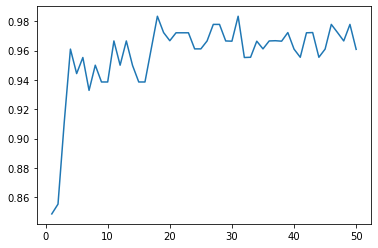

In [34]:
plt.plot(n, gf)
    

In [40]:
rf = RandomForestClassifier(n_estimators=15,random_state=111)
rf.fit(X,y)
ft = pd.Series(rf.feature_importances_, index=wine.feature_names).sort_values(ascending=False)
ft

proline                         0.184565
hue                             0.149888
flavanoids                      0.131295
alcohol                         0.127023
color_intensity                 0.112966
od280/od315_of_diluted_wines    0.112383
magnesium                       0.053183
total_phenols                   0.043143
malic_acid                      0.021431
alcalinity_of_ash               0.019106
proanthocyanins                 0.018535
ash                             0.014750
nonflavanoid_phenols            0.011732
dtype: float64